In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyxdf
import mne

%matplotlib qt

# Analyze screen flicker delay/jitter

## Load lsl recording

In [2]:
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-002_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-vsync_test_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-vsync_test_run-002_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-vsync_test_run-005_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-vsync_test_psychopy_run-001_eeg.xdf'
fpath = 'C:/Users/Experiment/Documents/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg.xdf'
# fpath = 'C:/Users/Experiment/Documents/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg_old1.xdf'
# fpath = "../../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
fpath = "../../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-slow_erp_test_run-003_eeg.xdf"
fpath = "../../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-pyglet_slow_erp_run-001_eeg.xdf"
fpath = "../../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-pyglet_fast_erp_run-001_eeg.xdf"
fpath = "../../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-new-monitor-test_run-001_eeg.xdf"
fpath = "../../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-new_monitor_test_run-002_eeg.xdf"

fpath = 'D:/Documents/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-test_run_run-001_eeg.xdf'
fpath = "../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-block_1_run-001_eeg.xdf"
# "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run_run-001_eeg.xdf"
fpath = "../CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-test_run-001_eeg.xdf"
streams, header = pyxdf.load_xdf(fpath)

for stream in streams:
    print(stream['info']['name'])

['RestingStateMarkerStream']
['ButtonBoxMarkerStream']
['ScreenMarkerStream']
['LaserMarkerStream']
['AudioCueMarkerStream']
['MiscMarkerStream']
['Mic_001']


In [3]:
streams = pyxdf.resolve_streams(fpath)
stream_ids = []
marker_ids = []
for stream in streams:
    print(f"stream name: {stream['name']}, stream_id: {stream['stream_id']}")
    if stream['name'] == 'Mic_001':
        stream_ids.append(stream['stream_id'])
    elif stream['name'] == 'LaserMarkerStream':
        marker_ids.append(stream['stream_id'])
    elif stream['name'] == 'ScreenMarkerStream':
        marker_ids.append(stream['stream_id'])
    else:
        continue

stream name: RestingStateMarkerStream, stream_id: 3
stream name: ButtonBoxMarkerStream, stream_id: 1
stream name: ScreenMarkerStream, stream_id: 7
stream name: LaserMarkerStream, stream_id: 2
stream name: AudioCueMarkerStream, stream_id: 5
stream name: MiscMarkerStream, stream_id: 6
stream name: Mic_001, stream_id: 4


In [4]:
stream_ids

[4]

In [5]:
marker_ids

[7, 2]

In [6]:
from xdf import read_raw_xdf

raw = read_raw_xdf(fpath, stream_ids=stream_ids, marker_ids=marker_ids, fs_new=120)

In [8]:
streams, header = pyxdf.load_xdf(fpath)

for stream in streams:
    print(stream['info']['name'])
laser_stream = [s for s in streams if s['info']['name'][0] == 'LaserMarkerStream'][0]
screen_stream = [s for s in streams if s['info']['name'][0] == 'ScreenMarkerStream'][0]

['RestingStateMarkerStream']
['ButtonBoxMarkerStream']
['ScreenMarkerStream']
['LaserMarkerStream']
['AudioCueMarkerStream']
['MiscMarkerStream']
['Mic_001']


In [26]:
laser_timeseries = pd.Series([i[0] for i in laser_stream['time_series']])
df_laser_timeseries= laser_timeseries.str.split(';', expand=True)
df_laser_timeseries.columns = ['protocol', 'trial', 'trial_id', 'is_target', 'target_id', 'seq']
df_laser_timeseries

,protocol,trial,trial_id,is_target,target_id,seq
0,cvep,start,2,null,0,null
1,cvep,null,2,0,0,0
2,cvep,null,2,1,0,1
3,cvep,null,2,0,0,2
4,cvep,null,2,1,0,3
...,...,...,...,...,...,...
7243,cvep,null,9,0,6,752
7244,cvep,null,9,1,6,753
7245,cvep,null,9,1,6,754
7246,cvep,null,9,1,6,755


In [29]:
screen_timeseries = pd.Series([i[0] for i in screen_stream['time_series']])
df_screen_timeseries= screen_timeseries.str.split(';', expand=True)
df_screen_timeseries.columns = ['protocol', 'trial', 'trial_id', 'is_target', 'target_id', 'seq']
df_screen_timeseries = df_screen_timeseries[df_screen_timeseries['trial_id'] != '999']
df_screen_timeseries

,protocol,trial,trial_id,is_target,target_id,seq
62,cvep,start,0,null,4,null
63,cvep,null,0,1,4,0
64,cvep,null,0,0,4,1
65,cvep,null,0,1,4,2
66,cvep,null,0,1,4,3
...,...,...,...,...,...,...
7451,cvep,null,7,1,5,752
7452,cvep,null,7,0,5,753
7453,cvep,null,7,0,5,754
7454,cvep,null,7,1,5,755


In [71]:
# For cvep check if all stims are being presented accurately.
from utils import load_codebooks_block_3

protocol = 'cvep'
df_sub = df_screen_timeseries[df_screen_timeseries['protocol'] == protocol]
for trial_id in ['0', '1', '4', '5', '6', '7']:
    trial = df_sub[df_sub['trial_id'] == trial_id]
    trial = trial[trial['trial'] == 'null']
    seq = trial['is_target'].astype(int).to_numpy()
    obj_ids = trial['target_id'].unique().astype(int)
    seq_orig = load_codebooks_block_3()[0, :, obj_ids[0]]
    if trial_id in ['4', '5']:
        seq_orig_1 = load_codebooks_block_3()[0, :, obj_ids[0]]
        seq_orig_2 = load_codebooks_block_3()[0, :, obj_ids[1]]
        seq_orig = np.hstack([seq_orig_1, seq_orig_2])

    print(seq.shape, seq_orig.shape)
    print(np.array_equal(seq, seq_orig))


(756,) (756,)
True
(756,) (756,)
True
(1512,) (1512,)
True
(1512,) (1512,)
True
(756,) (756,)
True
(756,) (756,)
True


In [ ]:
# For erp check if all stims are being presented accurately.
from utils import load_codebooks_block_2

protocol = 'erp'
df_sub = df_screen_timeseries[df_screen_timeseries['protocol'] == protocol]
for trial_id in ['8', '9', '6', '7', '2', '3']:
    trial = df_sub[df_sub['trial_id'] == trial_id]
    trial = trial[trial['trial'] == 'null']
    seq = trial['is_target'].astype(int).to_numpy()
    obj_ids = trial['target_id'].unique().astype(int)
    print(obj_ids)
    if trial_id in ['6', '7']:
        seq_orig = load_codebooks_block_2()[0, :, obj_ids[0]]
    elif trial_id in ['8', '9']:
        seq_orig_1 = load_codebooks_block_2()[1, :, obj_ids[0]]
        seq_orig_2 = load_codebooks_block_2()[2, :, obj_ids[1]]
        seq_orig = np.hstack([seq_orig_1, seq_orig_2])
    elif trial_id in ['2', '3']:
        seq_orig = load_codebooks_block_2()[, :, obj_ids[0]]

    print(seq.shape, seq_orig.shape)
    print(np.array_equal(seq, seq_orig))

[1 7]
(96,) (96,)
True
[6 0]
(96,) (96,)
True
[4]
(48,) (48,)
True
[2]
(48,) (48,)
True
[3]
(48,) (48,)
True
[5]
(48,) (48,)
True


In [82]:
# For erp check if all stims are being presented accurately.
from utils import load_codebooks_block_2

protocol = 'erp'
df_sub = df_laser_timeseries[df_laser_timeseries['protocol'] == protocol]
for trial_id in ['8', '9', '6', '7', '4', '5', '0', '1']:
    trial = df_sub[df_sub['trial_id'] == trial_id]
    trial = trial[trial['trial'] == 'null']
    seq = trial['is_target'].astype(int).to_numpy()
    obj_ids = trial['target_id'].unique().astype(int)
    print(obj_ids)
    if trial_id in ['8', '9']:
        seq_orig = load_codebooks_block_2()[0, :, obj_ids[0]]
    elif trial_id in ['6', '7']:
        seq_orig = load_codebooks_block_2()[1, :, obj_ids[0]]
    elif trial_id in ['4', '5']:
        seq_orig = load_codebooks_block_2()[3, :, obj_ids[0]]
    elif trial_id in ['0', '1']:
        seq_orig = load_codebooks_block_2()[2, :, obj_ids[0]]

    print(seq.shape, seq_orig.shape)
    print(np.array_equal(seq, seq_orig))

[7]
(48,) (48,)
True
[5]
(48,) (48,)
True
[1]
(48,) (48,)
True
[3]
(48,) (48,)
True
[6]
(48,) (48,)
True
[4]
(48,) (48,)
True
[0]
(48,) (48,)
True
[2]
(48,) (48,)
True


In [84]:
# For erp check if all stims are being presented accurately.
from utils import load_codebooks_block_1

protocol = 'kolkhorst'
df_sub = df_laser_timeseries[df_laser_timeseries['protocol'] == protocol]
for trial_id in ['4', '5', '2', '3', '6', '7', '0', '1']:
    trial = df_sub[df_sub['trial_id'] == trial_id]
    trial = trial[trial['trial'] == 'null']
    seq = trial['is_target'].astype(int).to_numpy()
    obj_ids = trial['target_id'].unique().astype(int)
    print(obj_ids)
    if trial_id in ['4', '5']:
        seq_orig = load_codebooks_block_1()[0, :, obj_ids[0]]
    elif trial_id in ['2', '3']:
        seq_orig = load_codebooks_block_1()[1, :, obj_ids[0]]
    elif trial_id in ['6', '7']:
        seq_orig = load_codebooks_block_1()[2, :, obj_ids[0]]
    elif trial_id in ['0', '1']:
        seq_orig = load_codebooks_block_1()[3, :, obj_ids[0]]

    print(seq.shape, seq_orig.shape)
    print(np.array_equal(seq, seq_orig))

[2]
(96,) (96,)
True
[5]
(96,) (96,)
True
[6]
(96,) (96,)
True
[4]
(96,) (96,)
True
[1]
(96,) (96,)
True
[7]
(96,) (96,)
True
[0]
(96,) (96,)
True
[3]
(96,) (96,)
True


In [85]:
# For cvep check if all stims are being presented accurately.
from utils import load_codebooks_block_3

protocol = 'cvep'
df_sub = df_laser_timeseries[df_laser_timeseries['protocol'] == protocol]
for trial_id in ['2', '3', '0', '1', '8', '9']:
    trial = df_sub[df_sub['trial_id'] == trial_id]
    trial = trial[trial['trial'] == 'null']
    seq = trial['is_target'].astype(int).to_numpy()
    obj_ids = trial['target_id'].unique().astype(int)
    seq_orig = load_codebooks_block_3()[0, :, obj_ids[0]]
    if trial_id in ['2', '3']:
        seq_orig_1 = load_codebooks_block_3()[0, :, obj_ids[0]]
        seq_orig_2 = load_codebooks_block_3()[0, :, obj_ids[1]]
        seq_orig = np.hstack([seq_orig_1, seq_orig_2])

    print(seq.shape, seq_orig.shape)
    print(np.array_equal(seq, seq_orig))


(1512,) (1512,)
True
(1512,) (1512,)
True
(756,) (756,)
True
(756,) (756,)
True
(756,) (756,)
True
(756,) (756,)
True


In [32]:
raw.set_montage('standard_1020')

<RawXDF | sub-P001_ses-S001_task-marker_test_run-001_eeg.xdf, 32 x 698001 (698.0 s), ~170.5 MiB, data loaded>

In [33]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('1'), np.str_('100'), np.str_('101'), np.str_('103'), np.str_('104'), np.str_('105'), np.str_('107'), np.str_('110'), np.str_('111'), np.str_('113'), np.str_('114'), np.str_('115'), np.str_('117'), np.str_('120'), np.str_('122'), np.str_('124'), np.str_('125'), np.str_('126'), np.str_('127'), np.str_('130'), np.str_('132'), np.str_('134'), np.str_('135'), np.str_('136'), np.str_('137'), np.str_('142'), np.str_('144'), np.str_('145'), np.str_('146'), np.str_('152'), np.str_('154'), np.str_('155'), np.str_('156'), np.str_('206'), np.str_('207'), np.str_('208'), np.str_('209'), np.str_('216'), np.str_('217'), np.str_('218'), np.str_('219'), np.str_('220'), np.str_('221'), np.str_('222'), np.str_('223'), np.str_('224'), np.str_('225'), np.str_('230'), np.str_('231'), np.str_('232'), np.str_('233'), np.str_('234'), np.str_('235'), np.str_('262'), np.str_('263'), np.str_('264'), np.str_('265'), np.str_('272'), np.str_('273'), np.str_('274'), np.str_('2

In [34]:
%matplotlib qt
raw.plot()

In [18]:
epochs = mne.Epochs(raw, event_repeated='merge')

Used Annotations descriptions: [np.str_('101'), np.str_('103'), np.str_('105'), np.str_('107'), np.str_('111'), np.str_('113'), np.str_('115'), np.str_('117'), np.str_('120'), np.str_('122'), np.str_('124'), np.str_('125'), np.str_('130'), np.str_('132'), np.str_('134'), np.str_('135'), np.str_('142'), np.str_('144'), np.str_('145'), np.str_('146'), np.str_('152'), np.str_('154'), np.str_('155'), np.str_('156'), np.str_('206'), np.str_('207'), np.str_('208'), np.str_('209'), np.str_('216'), np.str_('217'), np.str_('218'), np.str_('219'), np.str_('220'), np.str_('221'), np.str_('222'), np.str_('223'), np.str_('230'), np.str_('231'), np.str_('232'), np.str_('233'), np.str_('262'), np.str_('263'), np.str_('264'), np.str_('265'), np.str_('272'), np.str_('273'), np.str_('274'), np.str_('275')]
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3615 matching events found
Setting baseline interval to [-0.2000012280

In [20]:
384 / 12

32.0

In [19]:
epochs['130', '132', '134', '135']

<Epochs | 1536 events (good & bad), -0.2 – 0.5 s (baseline -0.2 – 0 s), ~49 KiB, data not loaded,
 np.str_('130'): 384
 np.str_('132'): 384
 np.str_('134'): 383
 np.str_('135'): 384
 '134/220': 1>

In [20]:
event_id

{np.str_('0'): 1,
 np.str_('1'): 2,
 np.str_('100'): 3,
 np.str_('101'): 4,
 np.str_('103'): 5,
 np.str_('104'): 6,
 np.str_('105'): 7,
 np.str_('107'): 8,
 np.str_('110'): 9,
 np.str_('111'): 10,
 np.str_('113'): 11,
 np.str_('114'): 12,
 np.str_('115'): 13,
 np.str_('117'): 14,
 np.str_('120'): 15,
 np.str_('122'): 16,
 np.str_('124'): 17,
 np.str_('125'): 18,
 np.str_('126'): 19,
 np.str_('127'): 20,
 np.str_('130'): 21,
 np.str_('132'): 22,
 np.str_('134'): 23,
 np.str_('135'): 24,
 np.str_('136'): 25,
 np.str_('137'): 26,
 np.str_('142'): 27,
 np.str_('144'): 28,
 np.str_('145'): 29,
 np.str_('146'): 30,
 np.str_('152'): 31,
 np.str_('154'): 32,
 np.str_('155'): 33,
 np.str_('156'): 34,
 np.str_('206'): 35,
 np.str_('207'): 36,
 np.str_('208'): 37,
 np.str_('209'): 38,
 np.str_('216'): 39,
 np.str_('217'): 40,
 np.str_('218'): 41,
 np.str_('219'): 42,
 np.str_('220'): 43,
 np.str_('221'): 44,
 np.str_('222'): 45,
 np.str_('223'): 46,
 np.str_('224'): 47,
 np.str_('225'): 48,
 np.s

In [5]:
marker_timeseries

array([200, 100, 110, ..., 101, 111, 217], shape=(1616,), dtype=int16)

In [12]:
sensor_timeseries

array([], dtype=float64)

## Check if marker is the same as codebook

In [6]:
# CHeck if marker time_series is the same as codebook
from utils import load_codebooks_block_2
codebook = load_codebooks_block_2()[0, :, 0]

trial_start_idx = np.where(marker_timeseries == 200)[0][0]
trial_end_idx = np.where(marker_timeseries == 210)[0][0]
marker_timeseries = marker_timeseries[trial_start_idx+1:trial_end_idx]
marker_timestamp = marker_timestamp[trial_start_idx+1:trial_end_idx]
marker_timeseries = (marker_timeseries == 110).astype(int)

np.array_equal(codebook, marker_timeseries)


False

In [7]:
marker_timeseries

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

## Clip start and end time

In [8]:
sensor_timeseries = sensor_timeseries[(sensor_timestamp > marker_timestamp[0]) & (sensor_timestamp < marker_timestamp[-1] + 0.025)]
sensor_timestamp = sensor_timestamp[(sensor_timestamp > marker_timestamp[0]) & (sensor_timestamp < marker_timestamp[-1] + 0.025)]
print(sensor_timeseries.shape, sensor_timestamp.shape)

%matplotlib qt
plt.plot(marker_timestamp, marker_timeseries, marker='o', label='marker')
plt.plot(sensor_timestamp, sensor_timeseries, marker='x', label='sensor')
plt.legend()
plt.show()


(0,) (0,)


## remove consecutive equal values from markers

In [9]:
new_idc = [0]
for i in range(1, len(marker_timeseries)):
    if marker_timeseries[i] != marker_timeseries[i - 1]:
        new_idc.append(i)

marker_timeseries = marker_timeseries[new_idc]
marker_timestamp = marker_timestamp[new_idc]

%matplotlib qt
plt.plot(marker_timestamp, marker_timeseries, marker='o', label='marker')
plt.plot(sensor_timestamp, sensor_timeseries, marker='x', label='sensor')
plt.legend()
plt.show()


## Filter sensor jitter

In [19]:
df_marker = pd.DataFrame(
    {
        'timestamp': marker_timestamp,
        'value': marker_timeseries
    }
)
df_sensor = pd.DataFrame(
    {
        'timestamp_sensor': sensor_timestamp,
        'value_sensor': sensor_timeseries
    }
)

df_merged = pd.merge_asof(df_marker, df_sensor, left_on='timestamp', right_on='timestamp_sensor', direction='nearest', tolerance=0.01)
print(df_merged.shape)
print(df_merged.head())
print('\n# of NaNs:')
print(df_merged.isna().sum())

(25, 4)
      timestamp  value  timestamp_sensor  value_sensor
0  84274.314067      0               NaN           NaN
1  84274.564088      1      84274.567760           1.0
2  84274.814094      0               NaN           NaN
3  84275.314081      1      84275.317671           1.0
4  84275.564110      0               NaN           NaN

# of NaNs:
timestamp            0
value                0
timestamp_sensor    13
value_sensor        13
dtype: int64


In [20]:
%matplotlib qt
plt.plot(marker_timestamp, marker_timeseries, marker='o', label='marker')
plt.plot(sensor_timestamp, sensor_timeseries, marker='x', label='sensor')
plt.plot(df_merged['timestamp_sensor'], df_merged['value_sensor'], marker='x', label='sensor_filtered')
plt.legend()
plt.show()

Mean delay: 0.0036131659253442194
Delay std: 8.584227309121878e-05


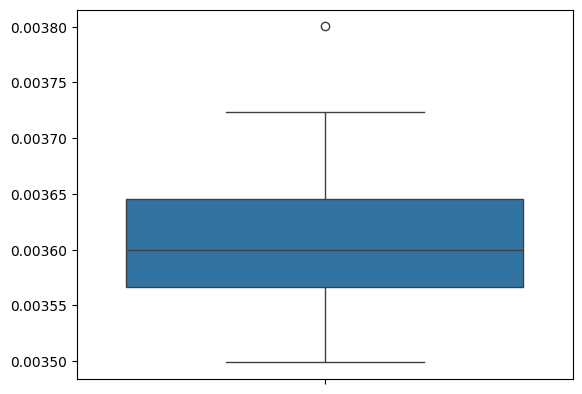

In [21]:
%matplotlib inline
diff = df_merged['timestamp_sensor'] - df_merged['timestamp']
print('Mean delay:', diff.mean())
print('Delay std:', diff.std())
plt.clf()
plt.cla()
sns.boxplot(df_merged['timestamp_sensor'] - df_merged['timestamp'])
plt.show()

In [30]:
# Mean delay: 0.003139559622785386
# Delay std: 0.0004232748245344668

In [20]:
%matplotlib qt
plt.scatter(df_merged['timestamp'], np.zeros_like(df_merged['timestamp']), marker='o', label='sensor_filtered')
plt.scatter(df_merged['timestamp_sensor'], np.zeros_like(df_merged['timestamp_sensor']), marker='x', label='sensor_filtered')
plt.show()

In [7]:
from utils import load_codebooks_block_2

codebook = load_codebooks_block_2()[0, :, 0]

In [8]:
codebook.shape

(48,)

In [ ]:
codebook

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.])